In [24]:
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, models, optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow .keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import cv2
from PIL import Image as pil_image



Using dataset from Dogs vs cat of kaggle competition: For reference: https://www.kaggle.com/c/dogs-vs-cats/data

In [13]:
path = "/mnt/c/Users/Alex Ossa/Downloads/dogs-vs-cats"

Perform some exploratory over the data

In [14]:

img = cv2.imread(path + "/train/cats/cat.0.jpg")
print(img.shape)
img = cv2.imread(path + "/train/dogs/dog.1.jpg")
print(img.shape)

(374, 500, 3)
(499, 327, 3)


In [15]:
model = models.Sequential()
# Conv layer 0
model.add(Conv2D(32, (3,3), activation= "relu",
                 padding = "same", 
                 kernel_regularizer = regularizers.l2(0.0001),
                 input_shape= (128,128,3)))
model.add(Dropout(0.2))

# Conv layer 1
model.add(Conv2D(64, (3,3), activation= "relu", 
                 padding = "same", 
                 kernel_regularizer = regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))

# Conv layer 2
model.add(Conv2D(128, (3,3), activation= "relu", 
                 padding = "same", 
                 kernel_regularizer = regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))

# Conv layer 3
model.add(Conv2D(128, (3,3), activation= "relu", 
                 padding = "same", 
                 kernel_regularizer = regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))

# flatten
model.add(Flatten())
# Dense Layer 1
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation= "sigmoid"))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,019,073 (64.92 MB)

 Trainable params: 17,019,073 (64.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss= "binary_crossentropy", optimizer= optimizers.Adam(), metrics =["accuracy"])


In [17]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [18]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory("/mnt/c/Users/Alex Ossa/Downloads/dogs-vs-cats/train",
                                                    target_size= (128,128),
                                                    batch_size= 32,
                                                    class_mode= "binary"
                                                    )

Found 20000 images belonging to 2 classes.


In [20]:
validation_generator = validation_datagen.flow_from_directory("/mnt/c/Users/Alex Ossa/Downloads/dogs-vs-cats/validation",
                                                    target_size= (128,128),
                                                    batch_size= 32,
                                                    class_mode= "binary"
                                                    )

Found 5000 images belonging to 2 classes.


In [21]:
checkpoint = ModelCheckpoint("model_dog_cat.keras", monitor = "vla_accuracy", verbose= 1, save_best_only= True)


In [22]:
hist = model.fit(train_generator, steps_per_epoch= 20000 // 32,
                 epochs = 100,
                 validation_data = validation_generator,
                 validation_steps = 5000//32,
                 callbacks= [checkpoint])

Epoch 1/100


2025-03-24 22:14:48.112846: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-03-24 22:14:49.373821: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.5135 - loss: 0.7885

2025-03-24 22:16:28.732208: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 448.28MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-03-24 22:16:28.868278: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-03-24 22:16:29.282753: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 179ms/step - accuracy: 0.5135 - loss: 0.7884 - val_accuracy: 0.5232 - val_loss: 0.7032
Epoch 2/100


/home/alexossa/cnn_tensorflow_practice/cnn_dogs_cats/lib/python3.10/site-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with vla_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 164ms/step - accuracy: 0.5480 - loss: 0.6982 - val_accuracy: 0.5855 - val_loss: 0.6889
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 163ms/step - accuracy: 0.5875 - loss: 0.6779 - val_accuracy: 0.6567 - val_loss: 0.6317
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 165ms/step - accuracy: 0.6521 - loss: 0.6273 - val_accuracy: 0.7298 - val_loss: 0.5429
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 164ms/step - accuracy: 0.6819 - loss: 0.5932 - val_accuracy: 0.7466 - val_loss: 0.5267
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.6969 - loss: 0.5742 - val_accuracy: 0.7280 - val_loss: 0.5550
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 162ms/step - accuracy: 0.7154 - loss: 0.5561 - val_accuracy: 0.7570 - val_loss: 0.5038
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.7334 - loss: 0.5426 - val_accuracy: 0.7738 - val_loss: 0.4846
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 161ms/step - accuracy: 0.7337 - los

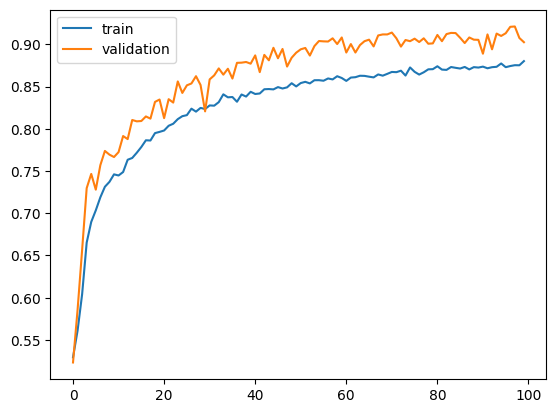

In [31]:
plt.plot(hist.history["accuracy"], label= "train")
plt.plot(hist.history["val_accuracy"], label= "validation")
plt.legend()
plt.show()